# Homework for Student Grades Dataset

Configures matplotlib to show figures embedded in notebook (removes necessity for plt.interactive and plt.show)

In [1]:
%matplotlib inline

Boilerplate python modules:

In [2]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load Transformed Data Set: Student Grades Transformed

In [3]:
df = pd.read_csv("/Users/jessie.sully/PycharmProjects/Data_150/data/Transposed studentgrades - Sheet1.csv")
df.head()

,Hours,Pass Fail,Grades
0,0.50,FAIL,72.50
1,0.75,FAIL,73.75
2,1.00,FAIL,75.00
3,1.25,FAIL,76.25
4,1.50,FAIL,77.50


## Question 1) _ What is the association between the number of hours spent studying and the probability that the student will pass the exam?_

To answer this question, we will show a boxplot of Hours spent studying grouped by whether the student passed or failed

Hours                                                   
          count   mean       std   min     25%    50%     75%  max
Pass Fail                                                         
FAIL       10.0  1.775  0.982132  0.50  1.0625  1.625  2.3750  3.5
PASS       10.0  3.800  1.246105  1.75  2.8750  4.125  4.6875  5.5

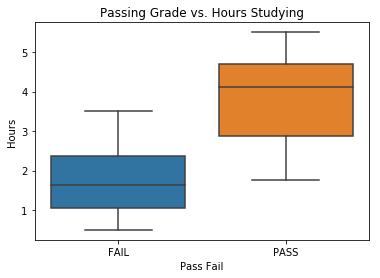

In [4]:
sns.boxplot(x = 'Pass Fail', y = 'Hours', data = df)
plt.title('Passing Grade vs. Hours Studying')
df[['Hours','Pass Fail']].groupby('Pass Fail').describe()

Conclusion: There is a clear difference in the distribution of hours studied between students that passed or failed. It appears that the students who studied 4+ hours had the highest probability of passing. 

## Question 2) _What are your predictions of a student passing if they spend 3.1 hours studying and if they spend 7 hours studying?_

Here we will create a Logistic Regression model

In [5]:
lr = LogisticRegression()
# Required input variables to LogisticRegression
# X : {array-like, sparse matrix}, shape (n_samples, n_features)
# y : array-like, shape (n_samples,)
X = np.column_stack((np.ones(len(df)), df['Hours']))
y = df['Pass Fail']
lr.fit(X, y)
print("Coefficients are ", lr.coef_)
# Note intercept is beta0 given above
print("Checking the y-intercept ", lr.intercept_)
# Note the score is not retunred by the LinearRegression object. It has to be computed from the input.
print("Score is ", lr.score(X, y))

Coefficients are  [[-0.92419996  0.75602391]]
Checking the y-intercept  [-0.92419996]
Score is  0.75


The accuracy of our model is `0.75`, which makes it an "okay" model, but not great. 

In [6]:
[prob_fail3, prob_pass3] = lr.predict_proba([[1, 3.1]])[0]
print('Probability of student passing with 3.1 hours studying is ' + str(prob_pass3))
print('Probability of student failing with 3.1 hours studying is ' + str(prob_fail3))

[prob_fail7, prob_pass7] = lr.predict_proba([[1, 7]])[0]
print('Probability of student passing with 7 hours studying is ' + str(prob_pass7))
print('Probability of student failing with 7 hours studying is ' + str(prob_fail7))

Probability of student passing with 3.1 hours studying is 0.621348110683
Probability of student failing with 3.1 hours studying is 0.378651889317
Probability of student passing with 7 hours studying is 0.969044728109
Probability of student failing with 7 hours studying is 0.0309552718912


## Question 3) _How is the number of hours spent studying related to the grade the student earned?_

We used the `lmplot` function in order to look at the relationship between hours spent studying and the grade earned

Correlation between hours spent studying and grade the student earned is: 0.951314433622


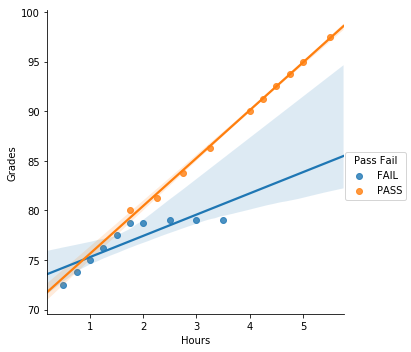

In [7]:
sns.lmplot('Hours', 'Grades', data=df, hue = 'Pass Fail', fit_reg=True)
corr = df['Hours'].corr(df['Grades'])
print('Correlation between hours spent studying and grade the student earned is: ' + str(corr))

There is a near perfect positive correlation between number of hours spent studying and the grade earned. There is a small group of people who studied hard, but unfortunately did not pass. 